## Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from google.colab import files

In [ ]:
uploaded = files.upload()
dataset=pd.read_csv('heart.csv')
dataset.head()

Saving heart.csv to heart (2).csv


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


##Handling Missing Data


In [ ]:
dataset.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
dataset.duplicated().sum()


np.int64(0)

##

In [ ]:
# Step 1: Define age groups
temp = dataset.copy()
temp["AgeGroup"] = pd.cut(temp["Age"],
                          bins=[0, 30, 40, 50, 60, 70, 80],
                          labels=["<30", "30-40", "40-50", "50-60", "60-70", "70-80"])

# Step 2: Group and aggregate
summary = temp.groupby("AgeGroup").agg(
    Male = ("Sex", lambda i: ((i == 'M') & (temp.loc[i.index, "HeartDisease"] == 1)).sum()),
    Female = ("Sex", lambda i: ((i == 'F') & (temp.loc[i.index, "HeartDisease"] == 1)).sum()),
    Most_Common_ChestPain = ("ChestPainType", lambda i: i.mode().iloc[0] if not i.mode().empty else None),
    Avg_MaxHR = ("MaxHR", "mean")
).reset_index()


print(summary)


  AgeGroup  Male  Female Most_Common_ChestPain   Avg_MaxHR
0      <30     0       0                   ATA  177.400000
1    30-40    28       4                   ASY  155.056818
2    40-50    86       7                   ASY  144.757848
3    50-60   202      20                   ASY  134.291339
4    60-70   127      18                   ASY  125.609137
5    70-80    15       1                   ASY  119.500000


<ipython-input-77-e48ff731a8d0>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = temp.groupby("AgeGroup").agg(


In [ ]:
x = dataset.iloc[: , :-1]
y = dataset.iloc[: , -1]
y

,HeartDisease
0,0
1,1
2,0
3,1
4,0
...,...
913,1
914,1
915,1
916,1


## Encoded Categorical Variables

In [ ]:
# M1-> x['Sex']=x['Sex'].map({'M':0,'F':1})
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x["Sex"]=le.fit_transform(x["Sex"])
x['ChestPainType']=le.fit_transform(x["ChestPainType"])
x['RestingECG']=le.fit_transform(x['RestingECG'])
x['ExerciseAngina']=le.fit_transform(x["ExerciseAngina"])
x['ST_Slope']=le.fit_transform(x["ST_Slope"])


## Feature Importance Analysis

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x,y)

# After training your Random Forest model:
Importance = rf.feature_importances_

feature_importance=pd.DataFrame({"Feature":x.columns,"Importance":Importance})
feature_importance.sort_values(by="Importance")

,Feature,Importance
5,FastingBS,0.023778
6,RestingECG,0.026546
1,Sex,0.033461
3,RestingBP,0.073176
0,Age,0.078383
8,ExerciseAngina,0.092014
7,MaxHR,0.105466
9,Oldpeak,0.116854
4,Cholesterol,0.116950
2,ChestPainType,0.124988


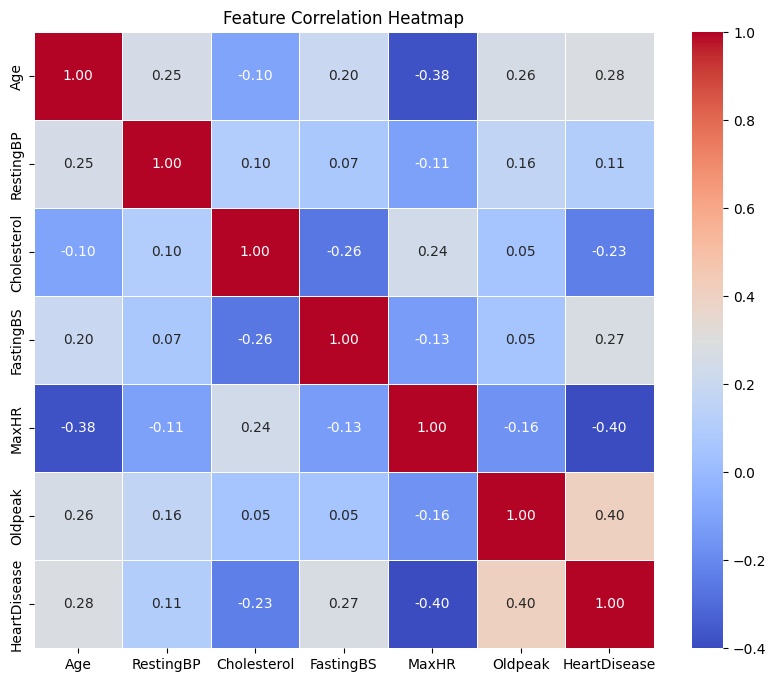

In [ ]:

# Compute the correlation matrix
corr_matrix = dataset.corr(numeric_only=True)  # Optional: numeric_only=True if you have categorical features

# Plot the heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

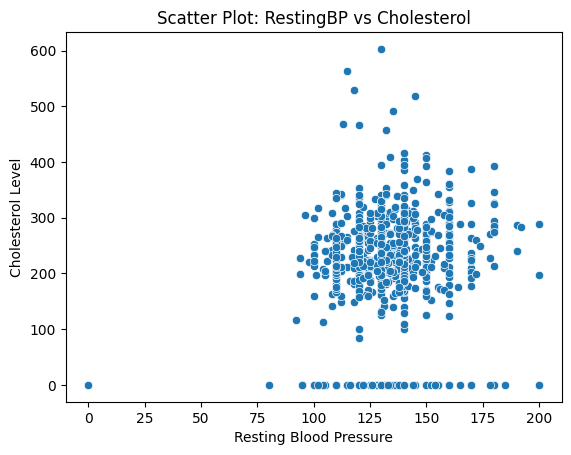

In [ ]:
# Scatter plot with regression line
sb.scatterplot(data=dataset, x="RestingBP", y="Cholesterol")
plt.title("Scatter Plot: RestingBP vs Cholesterol")
plt.xlabel("Resting Blood Pressure")
plt.ylabel("Cholesterol Level")
plt.show()

## Splitting Dataset Into Train And Test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

##Hyperparameter Tuning And Random Forest Classifier Model Training

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters={
    #total DT
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],

    #(default): Each tree is built on a random sample with replacement.
    'bootstrap': [True, False]
}
# Setup GridSearchCV
grid_search1 = GridSearchCV(estimator=rf, param_grid=parameters,
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Model Training
grid_search1.fit(x_train,y_train)


Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [ ]:
y_pred1=grid_search1.predict(x_test)
compare=pd.DataFrame({"Actual":y_test,"Predicted":y_pred1})
compare

,Actual,Predicted
668,0,0
30,1,1
377,1,1
535,1,1
807,0,0
...,...,...
211,1,1
745,1,1
584,1,1
878,0,0


User Input Prediction

In [ ]:
import numpy as np

print("Please enter the following patient details \n")

# Age
age = int(input("Age (in years): "))

# Sex
print("\nSex  Enter:")
print(" 0 = Female\n 1 = Male")
sex = int(input("Sex: "))

# Chest Pain Type
print("\nChestPainType  Enter:")
print(" 0 = ASY (Asymptomatic)\n 1 = ATA (Atypical Angina)")
print(" 2 = NAP (Non-Anginal Pain)\n 3 = TA (Typical Angina)")
cp = int(input("ChestPainType: "))

# Resting Blood Pressure
resting_bp = int(input("\nResting Blood Pressure (in mm Hg): "))

# Cholesterol
cholesterol = int(input("Cholesterol (in mg/dl): "))

# FastingBS
print("\nFastingBS  Enter:")
print(" 0 = No (Fasting Blood Sugar < 120 mg/dl)")
print(" 1 = Yes (Fasting Blood Sugar > 120 mg/dl)")
fasting_bs = int(input("FastingBS: "))

# Resting ECG
print("\nRestingECG  Enter:")
print(" 0 = Normal\n 1 = ST (Having ST-T wave abnormality)")
print(" 2 = LVH (Left Ventricular Hypertrophy)")
ecg = int(input("RestingECG: "))

# Max Heart Rate
max_hr = int(input("\nMax Heart Rate Achieved: "))

# Exercise Angina
print("\nExerciseAngina  Enter:")
print(" 0 = No\n 1 = Yes")
exercise_angina = int(input("ExerciseAngina: "))

# Oldpeak
oldpeak = float(input("\nOldpeak (ST depression induced by exercise): "))

# ST Slope
print("\nST_Slope  Enter:")
print(" 0 = Down\n 1 = Flat\n 2 = Up")
st_slope = int(input("ST_Slope: "))

# Combine input into a single list
user_input = [age, sex, cp, resting_bp, cholesterol, fasting_bs, ecg,
              max_hr, exercise_angina, oldpeak, st_slope]

# Convert to numpy array and reshaping it into a 2D array
user_input_np = np.array(user_input).reshape(1, -1)

# Make prediction using trained model (assuming your best model is grid_search)
prediction = grid_search1.predict(user_input_np)

# Final result
print("\n Prediction Result:")
if prediction[0] == 1:
    print(" Heart Disease Detected!")
else:
    print(" No Heart Disease Detected.")


Please enter the following patient details 



KeyboardInterrupt: Interrupted by user

##Confusion Matrix

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Accuracy
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred1)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred1)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred1)
print("F1 Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred1))


Accuracy: 0.875
Precision: 0.9038461538461539
Recall: 0.8785046728971962
F1 Score: 0.8909952606635071
Confusion Matrix:
 [[67 10]
 [13 94]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



##ROC And AUC Curve

AUC Score: 0.941740502488166


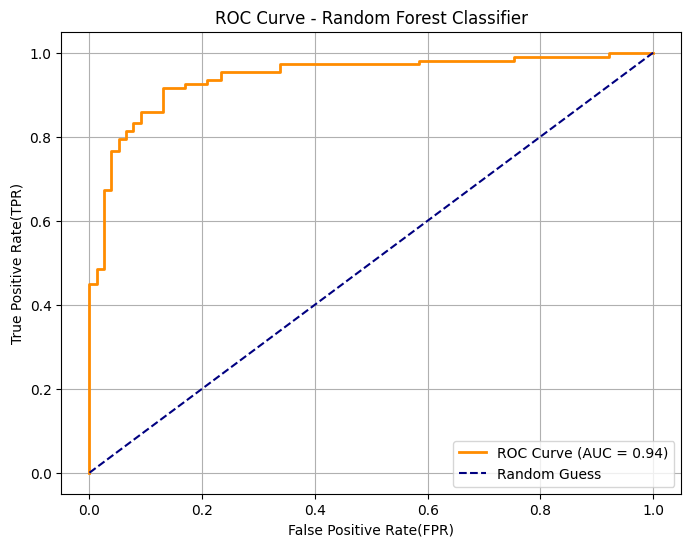

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score


#  Predict probabilities for class 1 (positive class)
y_pred_class1 = grid_search1.predict_proba(x_test)[:, 1]

# ROC Curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_class1)

# AUC Score
auc_score=roc_auc_score(y_test, y_pred_class1)
print("AUC Score:", auc_score)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color="darkorange", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='navy', label='Random Guess')
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ROC Curve - Random Forest Classifier")
plt.legend(loc="lower right")
plt.grid()
plt.show()


##HyperParameter Tuning And Logistic Regression Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lg=LogisticRegression()

parameters={
    'C': [0.01, 0.1, 1, 10, 100],         #Regularization strength
    'penalty': ['l1', 'l2'],              # Regularization type
    'solver': ['liblinear']               # Solver that supports both L1 and L2
    }

grid_search2=GridSearchCV(estimator=lg, param_grid=parameters, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

grid_search2.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

In [ ]:
y_pred2=grid_search2.predict(x_test)
compare=pd.DataFrame({"Actual":y_test,"Predicted":y_pred2})
compare

,Actual,Predicted
668,0,0
30,1,0
377,1,1
535,1,1
807,0,0
...,...,...
211,1,0
745,1,1
584,1,1
878,0,0


Confusion Matrix


In [ ]:

print("Please enter the following patient details \n")

# Age
age = int(input("Age (in years): "))

# Sex
print("\nSex  Enter:")
print(" 0 = Female\n 1 = Male")
sex = int(input("Sex: "))

# Chest Pain Type
print("\nChestPainType Enter:")
print(" 0 = ASY (Asymptomatic)\n 1 = ATA (Atypical Angina)")
print(" 2 = NAP (Non-Anginal Pain)\n 3 = TA (Typical Angina)")
cp = int(input("ChestPainType: "))

# Resting Blood Pressure
resting_bp = int(input("\nResting Blood Pressure (in mm Hg): "))

# Cholesterol
cholesterol = int(input("Cholesterol (in mg/dl): "))

# FastingBS
print("\nFastingBS Enter:")
print(" 0 = No (Fasting Blood Sugar < 120 mg/dl)")
print(" 1 = Yes (Fasting Blood Sugar > 120 mg/dl)")
fasting_bs = int(input("FastingBS: "))

# Resting ECG
print("\nRestingECG Enter:")
print(" 0 = Normal\n 1 = ST (Having ST-T wave abnormality)")
print(" 2 = LVH (Left Ventricular Hypertrophy)")
ecg = int(input("RestingECG: "))

# Max Heart Rate
max_hr = int(input("\nMax Heart Rate Achieved: "))

# Exercise Angina
print("\nExerciseAngina Enter:")
print(" 0 = No\n 1 = Yes")
exercise_angina = int(input("ExerciseAngina: "))

# Oldpeak
oldpeak = float(input("\nOldpeak (ST depression induced by exercise): "))

# ST Slope
print("\nST_Slope Enter:")
print(" 0 = Down\n 1 = Flat\n 2 = Up")
st_slope = int(input("ST_Slope: "))

# Combine input into a single list
user_input = [age, sex, cp, resting_bp, cholesterol, fasting_bs, ecg,
              max_hr, exercise_angina, oldpeak, st_slope]

# Convert to numpy array and reshaping it into a 2D array
user_input_np = np.array(user_input).reshape(1, -1)

# Make prediction using trained model (assuming your best model is grid_search)
prediction = grid_search2.predict(user_input_np)

# Final result
print("\n Prediction Result:")
if prediction[0] == 1:
    print(" Heart Disease Detected!")
else:
    print(" No Heart Disease Detected.")


Please enter the following patient details 



KeyboardInterrupt: Interrupted by user

##Performance Matrix Of Logistic Model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Accuracy
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred2)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred2)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred2)
print("F1 Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred2))


Accuracy: 0.8478260869565217
Precision: 0.9072164948453608
Recall: 0.822429906542056
F1 Score: 0.8627450980392157
Confusion Matrix:
 [[68  9]
 [19 88]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



##ROC And AUC Curve

AUC Score: 0.9010802281830319


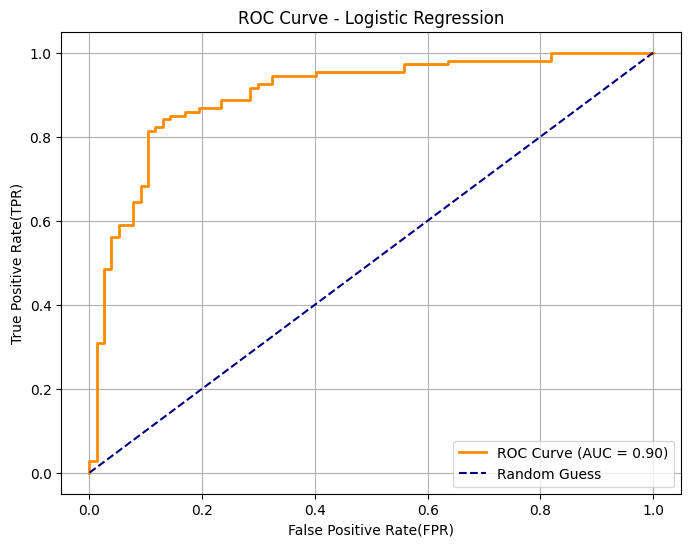

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score


#  Predict probabilities for class 1 (positive class)
y_pred_class2 = grid_search2.predict_proba(x_test)[:, 1]

# ROC Curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_class2)

# AUC Score
auc_score=roc_auc_score(y_test, y_pred_class2)
print("AUC Score:", auc_score)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color="darkorange", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='navy', label='Random Guess')
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid()
plt.show()
